### Script de preparação de dados do Trabalho de Conclusão
#### Curso de Especialização Lato Sensu em Ciência de Dados e Big Data
#### Instituição Pontifícia Universidade Católica de Minas Gerais
##### Título do trabalho: 'MACHINE LEARNING  PARA PREDIÇÃO DOS PREÇOS DIÁRIOS DE AÇÚCAR E ETANOL'
Autor: Rafael Vasconcelos Valadares <br>
Data: 04/05/2024 <br>
Email: rafaelvvaladares@hotmail.com <br>
Etapa: 5- Modelagem com dados de Machine Learning (parte I - açúcar)

In [6]:
# Definindo o diretório de trabalho

import os

# Obtendo o diretório de trabalho atual
diretorio_atual=os.getcwd()

# Mudando o diretório de trabalho
novo_diretorio= 'C:/Users/rafae/OneDrive/Área de Trabalho/Github_projetos/TCC/TCC_CANA/Dados_prontos'
os.chdir(novo_diretorio)

In [7]:
#Listando arquivos presentes no diretório atual

arquivos=os.listdir(novo_diretorio)

# Imprimindo os nomes dos arquivos

for arquivo in arquivos:
    print(arquivo)

dataset_atualizada.xlsx
decomposição_serie_acucar_plot.png
decomposição_serie_etanol_plot.png
df_sem_outliers.xlsx
eda_geral.xlsx
eda_preços.png
serie_etanol_açúcar_plot.png


In [8]:
# Importando o dataset preparado na etapa anterior
import pandas as pd

dados=pd.read_excel('df_sem_outliers.xlsx')
dados.head()

,data,safra,ano,mes,dia,preco_etanol_real,preco_etanol_dolar,preco_acucar_real,preco_acucar_dolar,ano_colheita,...,etanol_exportado_dolares,acucar_importado_dolares,etanol_importado_dolares,frota_automovel,gasolina_preco_medio,etanol_preco_medio,gnv_preco_medio,PPI,pandemia,perc_eta_gas
0,2012-01-03,2012/13,2012,1,3,1231.5,672.95,63.21,34.54,2012,...,72814482,45758,99676942,42682111,2.743,2.034,1.632,0,0,20.357804
1,2012-01-04,2012/13,2012,1,4,1239.5,677.69,63.38,34.65,2012,...,72814482,45758,99676942,42682111,2.743,2.034,1.632,0,0,20.357804
2,2012-01-05,2012/13,2012,1,5,1248.5,679.27,62.96,34.25,2012,...,72814482,45758,99676942,42682111,2.743,2.034,1.632,0,0,20.357804
3,2012-01-06,2012/13,2012,1,6,1259.0,679.07,62.90,33.93,2012,...,72814482,45758,99676942,42682111,2.743,2.034,1.632,0,0,20.357804
4,2012-01-09,2012/13,2012,1,9,1265.0,688.25,62.28,33.89,2012,...,72814482,45758,99676942,42682111,2.743,2.034,1.632,0,0,20.357804


In [9]:
# Remoção de variáveis sem informação útil para o dataset de previsão do preço do etanol

dados_etanol = dados.drop(columns = ['data',
    'safra', 'ano', 'mes', 'dia', 
    'preco_etanol_dolar', 'preco_acucar_dolar', 
    'ano_colheita', 'etanol_preco_medio'
])

dados_etanol.head()
#remover: safra, ano, mes, dia, preco_etanol_dolar, preco_acucar_dolar, ano_colheita, etanol_preco_medio

,preco_etanol_real,preco_acucar_real,area_brasil,area_centro-oeste,area_centro-sul,area_nordeste,area_norte,area_norte/nordeste,area_sudeste,produtividade_brasil,...,acucar_exportado_dolares,etanol_exportado_dolares,acucar_importado_dolares,etanol_importado_dolares,frota_automovel,gasolina_preco_medio,gnv_preco_medio,PPI,pandemia,perc_eta_gas
0,1231.5,63.21,8485.0,1504.11,7359.79,1083.22,41.99,1125.21,5243.29,69407.0,...,745050324,72814482,45758,99676942,42682111,2.743,1.632,0,0,20.357804
1,1239.5,63.38,8485.0,1504.11,7359.79,1083.22,41.99,1125.21,5243.29,69407.0,...,745050324,72814482,45758,99676942,42682111,2.743,1.632,0,0,20.357804
2,1248.5,62.96,8485.0,1504.11,7359.79,1083.22,41.99,1125.21,5243.29,69407.0,...,745050324,72814482,45758,99676942,42682111,2.743,1.632,0,0,20.357804
3,1259.0,62.90,8485.0,1504.11,7359.79,1083.22,41.99,1125.21,5243.29,69407.0,...,745050324,72814482,45758,99676942,42682111,2.743,1.632,0,0,20.357804
4,1265.0,62.28,8485.0,1504.11,7359.79,1083.22,41.99,1125.21,5243.29,69407.0,...,745050324,72814482,45758,99676942,42682111,2.743,1.632,0,0,20.357804


In [10]:
# Remoção de variáveis sem informação útil para o dataset de previsão do preço do açúcar

dados_acucar = dados.drop(columns = ['data',
    'safra', 'ano', 'mes', 'dia', 
    'preco_etanol_dolar', 'preco_acucar_dolar', 
    'ano_colheita', 'etanol_preco_medio'
])

dados_acucar.head()
#remover: safra, ano, mes, dia, preco_etanol_dolar, preco_acucar_dolar, ano_colheita, etanol_preco_medio

,preco_etanol_real,preco_acucar_real,area_brasil,area_centro-oeste,area_centro-sul,area_nordeste,area_norte,area_norte/nordeste,area_sudeste,produtividade_brasil,...,acucar_exportado_dolares,etanol_exportado_dolares,acucar_importado_dolares,etanol_importado_dolares,frota_automovel,gasolina_preco_medio,gnv_preco_medio,PPI,pandemia,perc_eta_gas
0,1231.5,63.21,8485.0,1504.11,7359.79,1083.22,41.99,1125.21,5243.29,69407.0,...,745050324,72814482,45758,99676942,42682111,2.743,1.632,0,0,20.357804
1,1239.5,63.38,8485.0,1504.11,7359.79,1083.22,41.99,1125.21,5243.29,69407.0,...,745050324,72814482,45758,99676942,42682111,2.743,1.632,0,0,20.357804
2,1248.5,62.96,8485.0,1504.11,7359.79,1083.22,41.99,1125.21,5243.29,69407.0,...,745050324,72814482,45758,99676942,42682111,2.743,1.632,0,0,20.357804
3,1259.0,62.90,8485.0,1504.11,7359.79,1083.22,41.99,1125.21,5243.29,69407.0,...,745050324,72814482,45758,99676942,42682111,2.743,1.632,0,0,20.357804
4,1265.0,62.28,8485.0,1504.11,7359.79,1083.22,41.99,1125.21,5243.29,69407.0,...,745050324,72814482,45758,99676942,42682111,2.743,1.632,0,0,20.357804


# Transformação dos dados

In [11]:
# Normalização dos dados - etanol
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

variavel_alvo = 'preco_etanol_real'
def normaliza_dataset(variavel_alvo, dados_etanol):
    variavel_alvo = variavel_alvo

    X_etanol = dados_etanol.drop(columns=[variavel_alvo])
    y_etanol = dados_etanol[variavel_alvo]

    # Inicializar o MinMaxScaler
    scaler = MinMaxScaler()

    # Transformar as variáveis preditoras
    X_etanol_normalizado = scaler.fit_transform(X_etanol)

    atributos_normalizados = pd.DataFrame(X_etanol_normalizado, columns=X_etanol.columns)

    # Combinando com a variável alvo
    dados_etanol_normalizado = pd.concat([atributos_normalizados, y_etanol.reset_index(drop=True)], axis=1)
    
    return dados_etanol_normalizado

dados_etanol_normalizados = normaliza_dataset(variavel_alvo, dados_etanol)
print(dados_etanol_normalizados)

      preco_acucar_real  area_brasil  area_centro-oeste  area_centro-sul  \
0              0.180054     0.254171           0.000000          0.00000   
1              0.181533     0.254171           0.000000          0.00000   
2              0.177878     0.254171           0.000000          0.00000   
3              0.177356     0.254171           0.000000          0.00000   
4              0.171961     0.254171           0.000000          0.00000   
...                 ...          ...                ...              ...   
2516           0.849012     0.000000           0.825074          0.01313   
2517           0.862675     0.000000           0.825074          0.01313   
2518           0.862675     0.000000           0.825074          0.01313   
2519           0.819511     0.000000           0.825074          0.01313   
2520           0.819511     0.000000           0.825074          0.01313   

      area_nordeste  area_norte  area_norte/nordeste  area_sudeste  \
0           1.000

In [12]:
# Padronização dos dados - açúcar

variavel_alvo = 'preco_acucar_real'

dados_acucar_normalizados = normaliza_dataset(variavel_alvo, dados_acucar)
print(dados_acucar_normalizados)

      preco_etanol_real  area_brasil  area_centro-oeste  area_centro-sul  \
0              0.073999     0.254171           0.000000          0.00000   
1              0.076714     0.254171           0.000000          0.00000   
2              0.079769     0.254171           0.000000          0.00000   
3              0.083333     0.254171           0.000000          0.00000   
4              0.085370     0.254171           0.000000          0.00000   
...                 ...          ...                ...              ...   
2516           0.663442     0.000000           0.825074          0.01313   
2517           0.663951     0.000000           0.825074          0.01313   
2518           0.664630     0.000000           0.825074          0.01313   
2519           0.665139     0.000000           0.825074          0.01313   
2520           0.663442     0.000000           0.825074          0.01313   

      area_nordeste  area_norte  area_norte/nordeste  area_sudeste  \
0           1.000

# Filtragem de variáveis selecionadas na etapa anterior (script 4)

In [13]:
#Açúcar
dados_acucar_normalizados=dados_acucar_normalizados[['pib', 'acucar_centro-oeste', 'acucar_exportado_dolares', 
 'acucar_importado_dolares', 'preco_petroleo', 'enos', 
 'etanol_importado_dolares', 'producao_brasil','preco_acucar_real']]
dados_acucar_normalizados

,pib,acucar_centro-oeste,acucar_exportado_dolares,acucar_importado_dolares,preco_petroleo,enos,etanol_importado_dolares,producao_brasil,preco_acucar_real
0,0.099843,0.687397,0.264319,0.091518,0.867363,0.407311,0.602327,0.046468,63.21
1,0.099843,0.687397,0.264319,0.091518,0.882142,0.407311,0.602327,0.046468,63.38
2,0.099843,0.687397,0.264319,0.091518,0.873105,0.407311,0.602327,0.046468,62.96
3,0.099843,0.687397,0.264319,0.091518,0.876118,0.407311,0.602327,0.046468,62.90
4,0.099843,0.687397,0.264319,0.091518,0.870376,0.407311,0.602327,0.046468,62.28
...,...,...,...,...,...,...,...,...,...
2516,0.999390,0.719669,0.386642,0.131560,0.585616,0.093995,0.057518,0.318696,140.08
2517,0.999390,0.719669,0.386642,0.131560,0.574132,0.093995,0.057518,0.318696,141.65
2518,0.999390,0.719669,0.386642,0.131560,0.601807,0.093995,0.057518,0.318696,141.65
2519,0.999390,0.719669,0.386642,0.131560,0.605667,0.093995,0.057518,0.318696,136.69


In [14]:
#Açúcar
dados_acucar_normalizados=dados_acucar_normalizados[['pib', 'acucar_centro-oeste', 'acucar_exportado_dolares', 
 'acucar_importado_dolares', 'preco_petroleo', 'enos', 
 'etanol_importado_dolares', 'producao_brasil','preco_acucar_real']]
dados_acucar_normalizados

,pib,acucar_centro-oeste,acucar_exportado_dolares,acucar_importado_dolares,preco_petroleo,enos,etanol_importado_dolares,producao_brasil,preco_acucar_real
0,0.099843,0.687397,0.264319,0.091518,0.867363,0.407311,0.602327,0.046468,63.21
1,0.099843,0.687397,0.264319,0.091518,0.882142,0.407311,0.602327,0.046468,63.38
2,0.099843,0.687397,0.264319,0.091518,0.873105,0.407311,0.602327,0.046468,62.96
3,0.099843,0.687397,0.264319,0.091518,0.876118,0.407311,0.602327,0.046468,62.90
4,0.099843,0.687397,0.264319,0.091518,0.870376,0.407311,0.602327,0.046468,62.28
...,...,...,...,...,...,...,...,...,...
2516,0.999390,0.719669,0.386642,0.131560,0.585616,0.093995,0.057518,0.318696,140.08
2517,0.999390,0.719669,0.386642,0.131560,0.574132,0.093995,0.057518,0.318696,141.65
2518,0.999390,0.719669,0.386642,0.131560,0.601807,0.093995,0.057518,0.318696,141.65
2519,0.999390,0.719669,0.386642,0.131560,0.605667,0.093995,0.057518,0.318696,136.69


In [15]:
#Etanol

dados_etanol_normalizados=dados_etanol_normalizados[['gasolina_preco_medio', 'preco_acucar_int', 'preco_petroleo', 
                                                     'etanol_importado_dolares', 'acucar_exportado_dolares', 'acucar_importado_dolares', 
                                                     'enos', 'etanol_exportado_dolares', 'igp-m', 'etanol_total_norte',
                                                    'preco_etanol_real']]
dados_etanol_normalizados

,gasolina_preco_medio,preco_acucar_int,preco_petroleo,etanol_importado_dolares,acucar_exportado_dolares,acucar_importado_dolares,enos,etanol_exportado_dolares,igp-m,etanol_total_norte,preco_etanol_real
0,0.004418,0.884905,0.867363,0.602327,0.264319,0.091518,0.407311,0.20098,0.569378,0.000000,1231.5
1,0.004418,0.879699,0.882142,0.602327,0.264319,0.091518,0.407311,0.20098,0.569378,0.000000,1239.5
2,0.004418,0.805090,0.873105,0.602327,0.264319,0.091518,0.407311,0.20098,0.569378,0.000000,1248.5
3,0.004418,0.814344,0.876118,0.602327,0.264319,0.091518,0.407311,0.20098,0.569378,0.000000,1259.0
4,0.004418,0.817235,0.870376,0.602327,0.264319,0.091518,0.407311,0.20098,0.569378,0.000000,1265.0
...,...,...,...,...,...,...,...,...,...,...,...
2516,0.496355,0.667438,0.585616,0.057518,0.386642,0.131560,0.093995,0.62769,0.334928,0.803005,2968.0
2517,0.496355,0.675535,0.574132,0.057518,0.386642,0.131560,0.093995,0.62769,0.334928,0.803005,2969.5
2518,0.496355,0.680740,0.601807,0.057518,0.386642,0.131560,0.093995,0.62769,0.334928,0.803005,2971.5
2519,0.496355,0.642568,0.605667,0.057518,0.386642,0.131560,0.093995,0.62769,0.334928,0.803005,2973.0


# Random Forest

In [52]:
# Bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [53]:
# Conjunto de dados
# Assuming the dataset is loaded and the target variable is 'preco_acucar_real'
X_acucar = dados_acucar_normalizados.drop(columns=['preco_acucar_real'])
y_acucar = dados_acucar_normalizados['preco_acucar_real']

In [54]:
# Segregando os dados
X_train, X_test, y_train, y_test = train_test_split(X_acucar, y_acucar, test_size=0.2, random_state=42)

In [59]:
# Treinando com Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [144]:
# Predição e avaliação da versão sem otimização
# Predictions
y_pred = rf.predict(X_test)

# Evaluate model performance
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)
    me = np.mean(y_test - y_pred)
    return mse, rmse, mae, mape, r2, me

mse_rf, rmse_rf, mae_rf, mape_rf, r2_rf, me_rf = evaluate_model(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse_rf}')
print(f'R-squared (R²): {r2_rf}')
print(f'Root Mean Squared Error (RMSE): {rmse_rf}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_rf}')
print(f'Mean Absolute Error (MAE): {mae_rf}')
print(f'Mean Error (ME): {me_rf}')

Mean Squared Error (MSE): 3.5907853819950875
R-squared (R²): 0.9956872966292388
Root Mean Squared Error (RMSE): 1.8949367751972854
Mean Absolute Percentage Error (MAPE): 1.4033397436928645
Mean Absolute Error (MAE): 1.0335002982083894
Mean Error (ME): -0.06098675129655912


In [62]:
# Tuning de hiperparametros com GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Melhores parâmetros
best_params_rf = grid_search.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [67]:
best_params_rf 

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

In [68]:
# Treinando o modelo com o melhor conjunto de parâmetros encontrados
best_rf = RandomForestRegressor(**best_params_rf, random_state=42)
best_rf.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=5, n_estimators=300, random_state=42)

In [71]:
# Avaliando o modelo otimizado
y_pred_best_rf = best_rf.predict(X_test)

# Métricas
mse_best_rf, rmse_best_rf, mae_best_rf, mape_best_rf, r2_best_rf, me_best_rf = evaluate_model(y_test, y_pred_best_rf)


In [146]:
# Comparativo
metrics_df_rf = pd.DataFrame({
    'Métricas': ['MSE', 'RMSE', 'MAE', 'MAPE', 'ME','R2'],
    'Sem otimização': [mse_rf, rmse_rf, mae_rf, mape_rf,me_rf, r2_rf],
    'Com otimização': [mse_best_rf, rmse_best_rf, mae_best_rf, mape_best_rf,me_best_rf, r2_best_rf]
})

print(metrics_df_rf)

  Métricas  Sem otimização  Com otimização
0      MSE        3.590785        3.529967
1     RMSE        1.894937        1.878821
2      MAE        1.033500        1.027508
3     MAPE        1.403340        1.395445
4       ME       -0.060987       -0.051696
5       R2        0.995687        0.995760


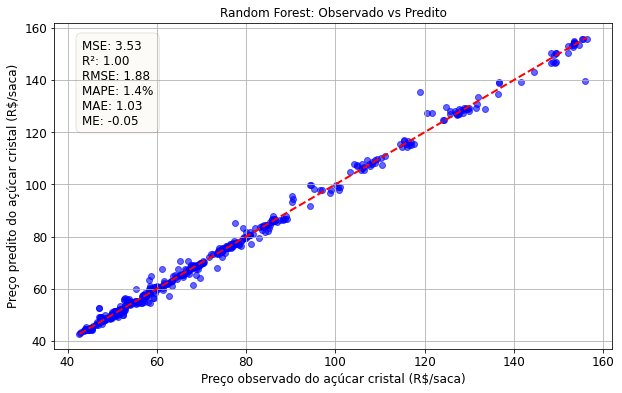

In [147]:
# Gráfico
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_rf, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Preço observado do açúcar cristal (R$/saca)', fontsize=12)
plt.ylabel('Preço predito do açúcar cristal (R$/saca)', fontsize=12)
plt.title('Random Forest: Observado vs Predito', fontsize=12)
plt.text(0.05, 0.95, f'MSE: {mse_best_rf:.2f}\nR²: {r2_best_rf:.2f}\nRMSE: {rmse_best_rf:.2f}\nMAPE: {mape_best_rf:.2}%\nMAE: {mae_best_rf:.2f}\nME: {me_best_rf:.2f}',
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', alpha=0.1, facecolor='wheat'))
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Suport Vector Machine

In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [85]:
# Load dataset (replace with your actual file path)
# dados_acucar = pd.read_csv('path_to_your_dataset.csv')

# Assuming the dataset is loaded and the target variable is 'preco_acucar_real'
X_acucar = dados_acucar_normalizados.drop(columns=['preco_acucar_real'])
y_acucar = dados_acucar_normalizados['preco_acucar_real']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_acucar, y_acucar, test_size=0.2, random_state=42)


In [86]:
# Train the SVM model
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
print(svr.get_params())

{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [148]:
# Predictions
y_pred = svr.predict(X_test)

# Evaluate model performance
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)
    me = np.mean(y_test - y_pred)
    return mse, rmse, mae, mape, r2, me

mse, rmse, mae, mape, r2, me = evaluate_model(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Error (ME): {me}')

Mean Squared Error (MSE): 83.29037791706924
R-squared (R²): 0.8999643099261658
Root Mean Squared Error (RMSE): 9.126356223437108
Mean Absolute Percentage Error (MAPE): 7.4334395530808175
Mean Absolute Error (MAE): 5.736404777506037
Mean Error (ME): 0.8850675491288925


In [88]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

grid_search = GridSearchCV(estimator=SVR(), param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters from grid search
best_params_svr = grid_search.best_params_



Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [51]:
best_params_svr

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

In [149]:
# Train the model with best parameters
best_svr = SVR(**best_params_svr)
best_svr.fit(X_train, y_train)

# Predictions with the best model
y_pred_best = best_svr.predict(X_test)

# Evaluate the optimized model performance
mse_best, rmse_best, mae_best, mape_best, r2_best, me_best = evaluate_model(y_test, y_pred_best)

# Combine metrics into a DataFrame
metrics_df_svm = pd.DataFrame({
    'Métricas': ['MSE', 'RMSE', 'MAE', 'MAPE', 'ME', 'R2'],
    'Sem otimização': [mse, rmse, mae, mape, me, r2],
    'Com otimização': [mse_best, rmse_best, mae_best, mape_best, me_best, r2_best]
})

print(metrics_df_svm)


  Métricas  Sem otimização  Com otimização
0      MSE       83.290378       11.136319
1     RMSE        9.126356        3.337112
2      MAE        5.736405        2.036856
3     MAPE        7.433440        2.817939
4       ME        0.885068        0.065720
5       R2        0.899964        0.986625


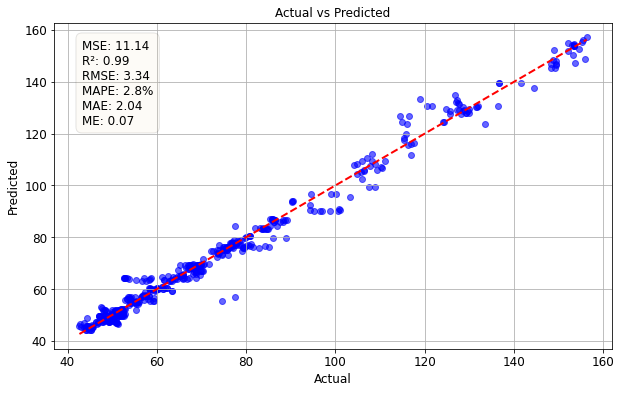

In [53]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.title('Actual vs Predicted', fontsize=12)
plt.text(0.05, 0.95, f'MSE: {mse_best:.2f}\nR²: {r2_best:.2f}\nRMSE: {rmse_best:.2f}\nMAPE: {mape_best:.2}%\nMAE: {mae_best:.2f}\nME: {me_best:.2f}',
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', alpha=0.1, facecolor='wheat'))
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# AdaBoost

In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [93]:
# Treina o modelo AdaBoost
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

print(ada.get_params())

{'estimator': None, 'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 50, 'random_state': None}


In [150]:
# Previsões
y_pred = ada.predict(X_test)
mse, rmse, mae, mape, r2, me = evaluate_model(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Error (ME): {me}')

Mean Squared Error (MSE): 43.891089838354624
R-squared (R²): 0.9472847215984039
Root Mean Squared Error (RMSE): 6.625035082047085
Mean Absolute Percentage Error (MAPE): 8.628187493525854
Mean Absolute Error (MAE): 5.6156554520840665
Mean Error (ME): -1.7213635234692006


In [96]:

# Otimização de hiperparâmetros usando GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10]
}

grid_search = GridSearchCV(estimator=AdaBoostRegressor(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Melhores parâmetros encontrados pelo grid search
best_params_ada = grid_search.best_params_
best_params_ada

Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'learning_rate': 1, 'n_estimators': 100}

In [151]:
# Treina o modelo com os melhores parâmetros
best_ada = AdaBoostRegressor(**best_params_ada)
best_ada.fit(X_train, y_train)

# Previsões com o melhor modelo
y_pred_best_ada = best_ada.predict(X_test)

# Avalia o desempenho do modelo otimizado
mse_best, rmse_best, mae_best, mape_best, r2_best, me_best = evaluate_model(y_test, y_pred_best_ada)

# Combina as métricas em um DataFrame
metrics_df_ada = pd.DataFrame({
    'Métricas': ['MSE', 'RMSE', 'MAE', 'MAPE', 'ME', 'R2'],
    'Sem otimização': [mse, rmse, mae, mape, me, r2],
    'Com otimização': [mse_best, rmse_best, mae_best, mape_best, me_best, r2_best]
})

print(metrics_df_ada)


  Métricas  Sem otimização  Com otimização
0      MSE       43.891090       41.977992
1     RMSE        6.625035        6.479042
2      MAE        5.615655        5.504359
3     MAPE        8.628187        8.352438
4       ME       -1.721364       -2.005125
5       R2        0.947285        0.949582


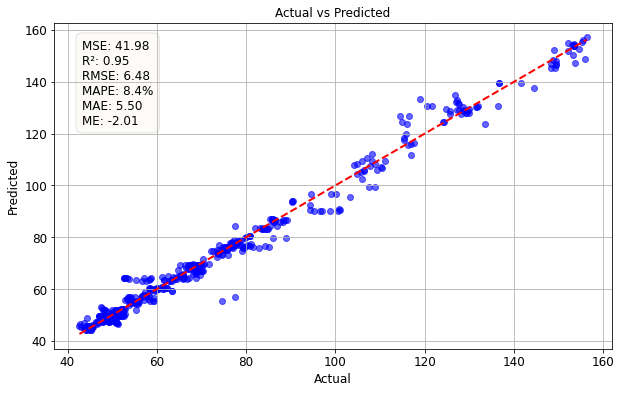

In [152]:

# Plotando valores reais versus previstos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.title('Actual vs Predicted', fontsize=12)
plt.text(0.05, 0.95, f'MSE: {mse_best:.2f}\nR²: {r2_best:.2f}\nRMSE: {rmse_best:.2f}\nMAPE: {mape_best:.2}%\nMAE: {mae_best:.2f}\nME: {me_best:.2f}',
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', alpha=0.1, facecolor='wheat'))
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Gradient Boosting

In [99]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt


In [100]:
# Treina o modelo Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

print(gbr.get_params())

{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [153]:

# Previsões
y_pred = gbr.predict(X_test)
mse, rmse, mae, mape, r2, me = evaluate_model(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Error (ME): {me}')

Mean Squared Error (MSE): 9.714444962739817
R-squared (R²): 0.9883324913413221
Root Mean Squared Error (RMSE): 3.116800436784463
Mean Absolute Percentage Error (MAPE): 3.2917354014733626
Mean Absolute Error (MAE): 2.268283275784669
Mean Error (ME): -0.08053168555980166


In [112]:

# Otimização de hiperparâmetros usando GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Melhores parâmetros encontrados pelo grid search
best_params_gbm = grid_search.best_params_
best_params_gbm

Fitting 5 folds for each of 36 candidates, totalling 180 fits


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

In [154]:

# Treina o modelo com os melhores parâmetros
best_gbr = GradientBoostingRegressor(**best_params_gbm)
best_gbr.fit(X_train, y_train)

# Previsões com o melhor modelo
y_pred_best = best_gbr.predict(X_test)

# Avalia o desempenho do modelo otimizado
mse_best, rmse_best, mae_best, mape_best, r2_best, me_best = evaluate_model(y_test, y_pred_best)

# Combina as métricas em um DataFrame
metrics_df_gbm = pd.DataFrame({
    'Métricas': ['MSE', 'RMSE', 'MAE', 'MAPE', 'ME', 'R2'],
    'Sem otimização': [mse, rmse, mae, mape, me, r2],
    'Com otimização': [mse_best, rmse_best, mae_best, mape_best, me_best, r2_best]
})

print(metrics_df_gbm)


  Métricas  Sem otimização  Com otimização
0      MSE        9.714445        3.039528
1     RMSE        3.116800        1.743424
2      MAE        2.268283        1.086097
3     MAPE        3.291735        1.518039
4       ME       -0.080532       -0.039540
5       R2        0.988332        0.996349


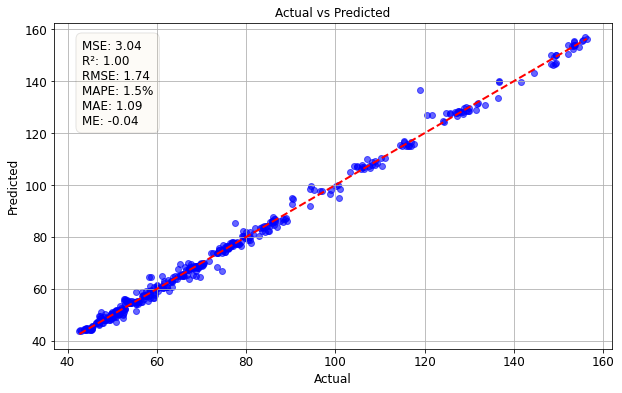

In [155]:

# Plotando valores reais versus previstos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.title('Actual vs Predicted', fontsize=12)
plt.text(0.05, 0.95, f'MSE: {mse_best:.2f}\nR²: {r2_best:.2f}\nRMSE: {rmse_best:.2f}\nMAPE: {mape_best:.2}%\nMAE: {mae_best:.2f}\nME: {me_best:.2f}',
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', alpha=0.1, facecolor='wheat'))
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# XGBoost

In [102]:
#!pip install xgboost
import xgboost as xgb

# Treina o modelo XGBoost
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train, y_train)
print(xgbr.get_params())

{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [156]:
# Previsões
y_pred = xgbr.predict(X_test)

# Avaliação do modelo (utilizando a função evaluate_model definida anteriormente)
mse, rmse, mae, mape, r2, me = evaluate_model(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Error (ME): {me}')


Mean Squared Error (MSE): 3.6337950017362886
R-squared (R²): 0.9956356400381869
Root Mean Squared Error (RMSE): 1.9062515578318326
Mean Absolute Percentage Error (MAPE): 1.4700950660396541
Mean Absolute Error (MAE): 1.0857278019366878
Mean Error (ME): -0.03812272175703884


In [104]:
# Otimização de hiperparâmetros usando GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400],
    'learning_rate': [0.001,0.01, 0.1, 0.15, 0.2, 0.3],
    'max_depth': [1, 3, 4, 5, 7]
}

grid_search = GridSearchCV(estimator=xgb.XGBRegressor(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Melhores parâmetros encontrados pelo grid search
best_params_xgb = grid_search.best_params_
best_params_xgb


Fitting 5 folds for each of 150 candidates, totalling 750 fits


{'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 400}

In [157]:
# Treina o modelo com os melhores parâmetros
best_xgbr = xgb.XGBRegressor(**best_params_xgb)
best_xgbr.fit(X_train, y_train)

# Previsões com o melhor modelo
y_pred_best_xgb = best_xgbr.predict(X_test)

# Avalia o desempenho do modelo otimizado
mse_best, rmse_best, mae_best, mape_best, r2_best, me_best = evaluate_model(y_test, y_pred_best_xgb)

# Combina as métricas em um DataFrame
metrics_df_xgbr = pd.DataFrame({
    'Métricas': ['MSE', 'RMSE', 'MAE', 'MAPE', 'ME', 'R2'],
    'Sem otimização': [mse, rmse, mae, mape, me, r2],
    'Com otimização': [mse_best, rmse_best, mae_best, mape_best, me_best, r2_best]
})

print(metrics_df_xgbr)


  Métricas  Sem otimização  Com otimização
0      MSE        3.633795        3.547831
1     RMSE        1.906252        1.883569
2      MAE        1.085728        1.106924
3     MAPE        1.470095        1.521039
4       ME       -0.038123       -0.012325
5       R2        0.995636        0.995739


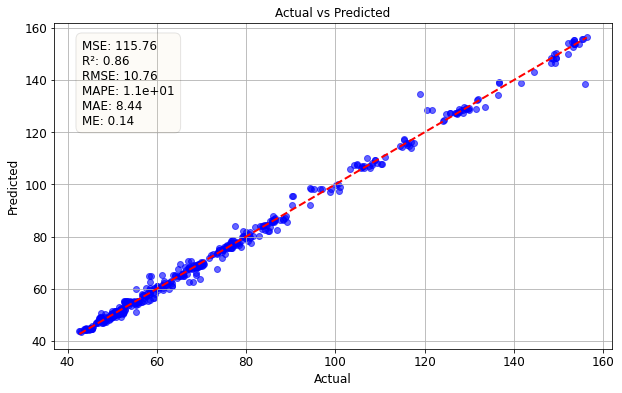

In [322]:
# Plotando valores reais versus previstos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_xgb, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.title('Actual vs Predicted', fontsize=12)
plt.text(0.05, 0.95, f'MSE: {mse_best:.2f}\nR²: {r2_best:.2f}\nRMSE: {rmse_best:.2f}\nMAPE: {mape_best:.2}\nMAE: {mae_best:.2f}\nME: {me_best:.2f}',
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', alpha=0.1, facecolor='wheat'))
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


# LightGBM

In [108]:
#!pip install lightgbm
import lightgbm as lgb

# Treina o modelo LightGBM
lgbm = lgb.LGBMRegressor()
lgbm.fit(X_train, y_train)
print(lgbm.get_params())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001010 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 2016, number of used features: 8
[LightGBM] [Info] Start training from score 74.492619
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}


In [158]:
# Previsões
y_pred = lgbm.predict(X_test)

# Avaliação do modelo (utilizando a função evaluate_model definida anteriormente)
mse, rmse, mae, mape, r2, me = evaluate_model(y_test, y_pred)


In [116]:

# Otimização de hiperparâmetros usando GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'num_leaves': [20, 31, 40]
}

grid_search = GridSearchCV(estimator=lgb.LGBMRegressor(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Melhores parâmetros encontrados pelo grid search
best_params_lgbr = grid_search.best_params_
best_params_lgbr


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 2016, number of used features: 8
[LightGBM] [Info] Start training from score 74.492619


{'learning_rate': 0.2, 'n_estimators': 300, 'num_leaves': 20}

In [159]:
# Treina o modelo com os melhores parâmetros
best_lgbm = lgb.LGBMRegressor(**best_params_lgbr)
best_lgbm.fit(X_train, y_train)

# Previsões com o melhor modelo
y_pred_best = best_lgbm.predict(X_test)

# Avalia o desempenho do modelo otimizado
mse_best, rmse_best, mae_best, mape_best, r2_best, me_best = evaluate_model(y_test, y_pred_best)

# Combina as métricas em um DataFrame
metrics_df_lgbr = pd.DataFrame({
    'Métricas': ['MSE', 'RMSE', 'MAE', 'MAPE', 'ME', 'R2'],
    'Sem otimização': [mse, rmse, mae, mape, me, r2],
    'Com otimização': [mse_best, rmse_best, mae_best, mape_best, me_best, r2_best]
})

print(metrics_df_lgbr)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 2016, number of used features: 8
[LightGBM] [Info] Start training from score 74.492619
  Métricas  Sem otimização  Com otimização
0      MSE        3.062187        2.939865
1     RMSE        1.749910        1.714603
2      MAE        1.103512        1.036879
3     MAPE        1.561991        1.438971
4       ME       -0.111881       -0.087067
5       R2        0.996322        0.996469


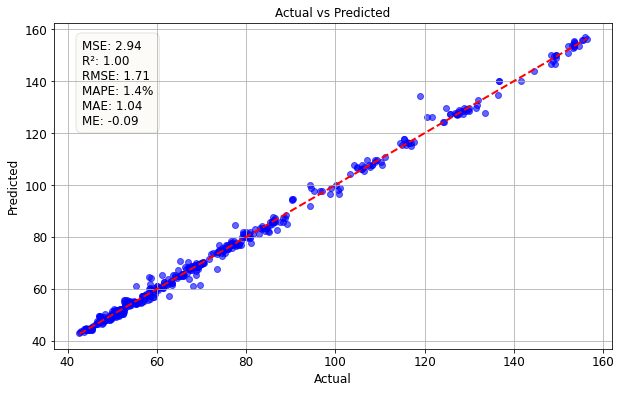

In [100]:
# Plotando valores reais versus previstos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.title('Actual vs Predicted', fontsize=12)
plt.text(0.05, 0.95, f'MSE: {mse_best:.2f}\nR²: {r2_best:.2f}\nRMSE: {rmse_best:.2f}\nMAPE: {mape_best:.2}%\nMAE: {mae_best:.2f}\nME: {me_best:.2f}',
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', alpha=0.1, facecolor='wheat'))
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Neural Network

In [2]:
!pip install numpy
import tensorflow
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.26.4 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.26.4 which is incompatible.


  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl (15.8 MB)


C:\Users\rafae\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [109]:
from scikeras.wrappers import KerasRegressor
def create_model(neurons=1, learning_rate=0.01):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Cria o KerasRegressor
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

model.fit(X_train, y_train)
print(model.get_params())

C:\Users\rafae\anaconda3\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\rafae\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


{'model': None, 'build_fn': <function create_model at 0x0000019BC54BC040>, 'warm_start': False, 'random_state': None, 'optimizer': 'rmsprop', 'loss': None, 'metrics': None, 'batch_size': 10, 'validation_batch_size': None, 'verbose': 0, 'callbacks': None, 'validation_split': 0.0, 'shuffle': True, 'run_eagerly': False, 'epochs': 100}


In [160]:
# Previsões
y_pred = model.predict(X_test)
y_pred = np.ravel(y_pred)
# Avaliação do modelo (utilizando a função evaluate_model definida anteriormente)
mse, rmse, mae, mape, r2, me = evaluate_model(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Error (ME): {me}')

Mean Squared Error (MSE): 162.3260272757239
R-squared (R²): 0.8050387504347818
Root Mean Squared Error (RMSE): 12.740723184957904
Mean Absolute Percentage Error (MAPE): 13.953071636962964
Mean Absolute Error (MAE): 9.9802425295386
Mean Error (ME): -0.8031922716197399


In [20]:
# Otimização de hiperparâmetros usando GridSearchCV
param_grid = {
    'model__neurons': [5, 10, 20],
    'model__learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [10, 20, 30],
    'epochs': [50, 100, 150]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Melhores parâmetros encontrados pelo grid search
best_params = grid_search.best_params_
best_params


Fitting 5 folds for each of 81 candidates, totalling 405 fits


C:\Users\rafae\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
C:\Users\rafae\anaconda3\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\rafae\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


{'batch_size': 10,
 'epochs': 100,
 'model__learning_rate': 0.1,
 'model__neurons': 20}

In [161]:
# Treina o modelo com os melhores parâmetros
best_neurons = best_params['model__neurons']
best_learning_rate = best_params['model__learning_rate']
best_epochs = best_params['epochs']
best_batch_size = best_params['batch_size']

best_model = create_model(neurons=best_neurons, learning_rate=best_learning_rate)
best_model.fit(X_train, y_train, epochs=best_epochs, batch_size=best_batch_size, verbose=0)

# Previsões com o melhor modelo
y_pred_best = best_model.predict(X_test)


C:\Users\rafae\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [162]:
# Converting y_pred to a 1-dimensional array
y_pred_best = np.ravel(y_pred_best)
print(y_pred_best)


[ 54.919945  68.72553   70.053795  48.81086  125.32798   53.969795
  78.64157  134.61237   55.6828   100.518364  62.27868   54.749588
  44.790043 126.72596  136.31279   59.84351   55.602528  44.164158
  58.50947   55.488712  70.7927    74.53521   78.67236   70.054634
 126.7268    71.58592   70.28047   54.236286  70.1448    68.75081
  56.220226 133.83904   54.227005  63.064026  76.85623   61.83323
  46.883648  95.0449    54.9885    54.0877    54.840652 126.74768
  54.42425   56.055008  72.37521   66.31998  124.56398   55.784096
  56.31371   54.2384    55.083725  55.026882  44.385433  56.844032
  54.747284  69.28254  132.28615   50.505356  54.775177  54.728832
  89.68008   91.05728   78.69409   57.74092   74.501045  76.44606
 134.74481  100.484406  57.519135  53.222466 136.12738   54.414986
  73.96282  131.53458   70.941895  89.6548    58.9223    54.096134
  54.790016  64.59328  126.7654   129.86995   85.63963   44.441166
  37.1476    73.39203   57.0063    62.663033 115.39563   44.57179


In [163]:
# Evaluate model performance
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)
    me = np.mean(y_test - y_pred)
    return mse, rmse, mae, mape, r2, me

# Avaliação do desempenho do modelo
mse_best, rmse_best, mae_best, mape_best, r2_best, me_best = evaluate_model(y_test, y_pred_best)

# Combina as métricas em um DataFrame
metrics_df_nnet = pd.DataFrame({
    'Métricas': ['MSE', 'RMSE', 'MAE', 'MAPE', 'ME', 'R2'],
    'Sem otimização': [mse, rmse, mae, mape, me, r2],
    'Com otimização': [mse_best, rmse_best, mae_best, mape_best, me_best, r2_best]
})

print(metrics_df_nnet)


  Métricas  Sem otimização  Com otimização
0      MSE      162.326027      115.758174
1     RMSE       12.740723       10.759097
2      MAE        9.980243        8.436543
3     MAPE       13.953072       11.349557
4       ME       -0.803192        0.135788
5       R2        0.805039        0.860969


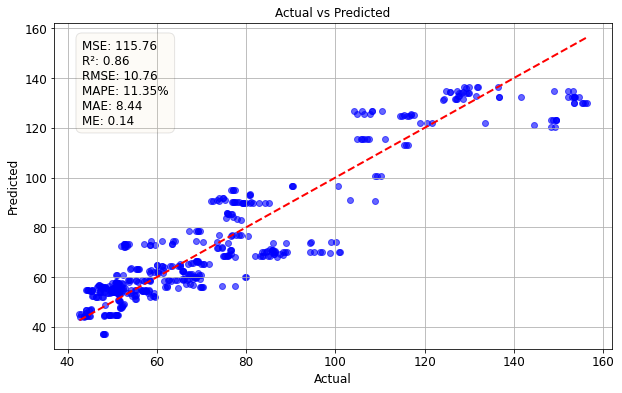

In [164]:


# Plotando valores reais versus previstos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.title('Actual vs Predicted', fontsize=12)
plt.text(0.05, 0.95, f'MSE: {mse_best:.2f}\nR²: {r2_best:.2f}\nRMSE: {rmse_best:.2f}\nMAPE: {mape_best:.2f}%\nMAE: {mae_best:.2f}\nME: {me_best:.2f}',
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', alpha=0.1, facecolor='wheat'))
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Avaliação conjunta

In [165]:
metrics_df_nnet['Modelo']='Rede Neural'
metrics_df_lgbr['Modelo'] = 'LightGBM'
metrics_df_xgbr['Modelo'] = 'XGBoost'
metrics_df_gbm['Modelo'] = 'Gradient Boosting'
metrics_df_ada['Modelo'] = 'AdaBoost'
metrics_df_svm = metrics_df_svm.rename(columns={'Métrica':'Métricas'})
metrics_df_svm['Modelo'] = 'SVM'
metrics_df_rf = metrics_df_rf.rename(columns={'Métrica':'Métricas'})
metrics_df_rf['Modelo']='Random Forest'

In [166]:
# Concatenate DataFrames
concatenated_df = pd.concat([metrics_df_nnet, metrics_df_lgbr, metrics_df_xgbr, metrics_df_gbm, metrics_df_ada, metrics_df_svm, metrics_df_rf], ignore_index=True)

# Print the concatenated DataFrame
print(concatenated_df)

   Métricas  Sem otimização  Com otimização             Modelo
0       MSE      162.326027      115.758174        Rede Neural
1      RMSE       12.740723       10.759097        Rede Neural
2       MAE        9.980243        8.436543        Rede Neural
3      MAPE       13.953072       11.349557        Rede Neural
4        ME       -0.803192        0.135788        Rede Neural
5        R2        0.805039        0.860969        Rede Neural
6       MSE        3.062187        2.939865           LightGBM
7      RMSE        1.749910        1.714603           LightGBM
8       MAE        1.103512        1.036879           LightGBM
9      MAPE        1.561991        1.438971           LightGBM
10       ME       -0.111881       -0.087067           LightGBM
11       R2        0.996322        0.996469           LightGBM
12      MSE        3.633795        3.547831            XGBoost
13     RMSE        1.906252        1.883569            XGBoost
14      MAE        1.085728        1.106924            

In [167]:
# Export to Excel
concatenated_df.to_excel('metrics_acucar.xlsx', index=False)

print("DataFrame exported to Excel successfully!")

DataFrame exported to Excel successfully!


In [206]:
#!pip install easy_mpl
import numpy as np
from easy_mpl import taylor_plot
from easy_mpl.utils import version_info

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


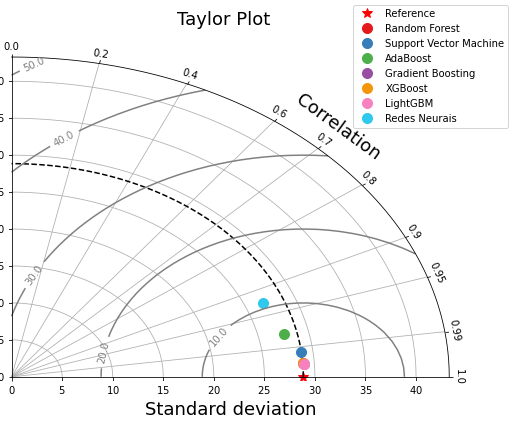

In [182]:
# taylor plot
observations =  y_test

### Modelos
# RNA
rna = best_model.predict(X_test)
rna = np.ravel(y_pred_best)
rf = best_rf.predict(X_test)
lgbm = best_lgbm.predict(X_test)
xgb = best_xgbr.predict(X_test)
gb = best_gbr.predict(X_test)
ada = best_ada.predict(X_test)
svr = best_svr.predict(X_test)



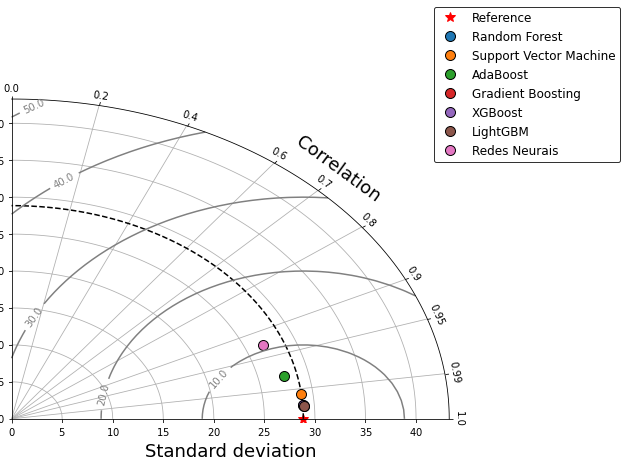

In [255]:
simulations =  {"Random Forest": rf,
                "Support Vector Machine":svr,
                "AdaBoost": ada,
                "Gradient Boosting":gb,
                "XGBoost": xgb,
                "LightGBM":lgbm,
                "Redes Neurais": rna}
_ = taylor_plot(
    observations=observations,
    simulations=simulations,
#    marker_kws={'markersize': 10, 'markeredgewidth': 1.5,
#                            'markeredgecolor': 'black', 'lw': 0.0},
    leg_kws={'facecolor': 'white',
                'edgecolor': 'black','bbox_to_anchor':(1.2, 1.1),
                'fontsize': 12, 'labelspacing': 0.5},
                marker_kws = {'ms':'10', 'markeredgecolor': 'k', 'lw': 0.0})

In [205]:
import numpy as np
del taylor_plot
# Supondo que y_test e rna sejam arrays do numpy
correlacao = np.corrcoef(y_test, rna)[0, 1]
print(correlacao**2)

0.8609931447812484


In [274]:
ensemble = pd.DataFrame({'rf':rf,'xgb': xgb, 'lgbm':lgbm})
ensemble['media']=ensemble.mean(numeric_only=True, axis=1)
ensemble['observado']=y_test.values
ensemble
# Avalia o desempenho do modelo otimizado
mse_ens, rmse_ens, mae_ens, mape_ens, r2_ens, me_ens = evaluate_model(ensemble['observado'], ensemble['media'])

print(f'Mean Squared Error (MSE): {mse_ens}')
print(f'R-squared (R²): {r2_ens}')
print(f'Root Mean Squared Error (RMSE): {rmse_ens}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_ens}')
print(f'Mean Absolute Error (MAE): {mae_ens}')
print(f'Mean Error (ME): {me_ens}')

Mean Squared Error (MSE): 3.0446324480296028
R-squared (R²): 0.9963432521789841
Root Mean Squared Error (RMSE): 1.7448875173000702
Mean Absolute Percentage Error (MAPE): 1.3996531467370796
Mean Absolute Error (MAE): 1.0207716705507137
Mean Error (ME): -0.05036266595944063


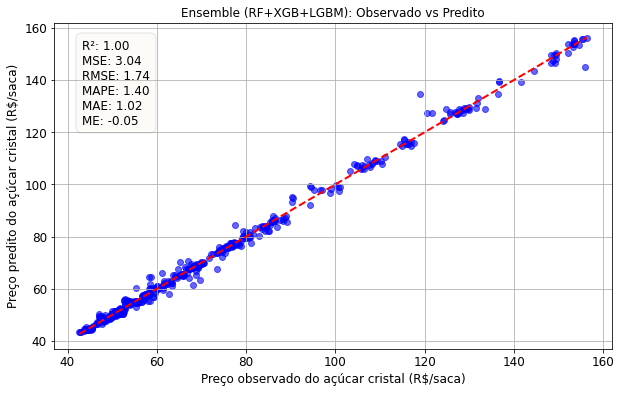

In [323]:
# Gráfico
plt.figure(figsize=(10, 6))
plt.scatter(ensemble['observado'], ensemble['media'], color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Preço observado do açúcar cristal (R$/saca)', fontsize=12)
plt.ylabel('Preço predito do açúcar cristal (R$/saca)', fontsize=12)
plt.title('Ensemble (RF+XGB+LGBM): Observado vs Predito', fontsize=12)
plt.text(0.05, 0.95, f'R²: {r2_ens:.2f}\nMSE: {mse_ens:.2f}\nRMSE: {rmse_ens:.2f}\nMAPE: {mape_ens:.2f}\nMAE: {mae_ens:.2f}\nME: {me_ens:.2f}',
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', alpha=0.1, facecolor='wheat'))
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [280]:
#Série temporal
rf_serie = best_rf.predict(X_acucar)
lgbm_serie = best_lgbm.predict(X_acucar)
xgb_serie = best_xgbr.predict(X_acucar)


,rf,xgb,lgbm
0,62.519327,62.655384,63.111871
1,62.935306,62.768982,62.761809
2,62.696256,62.731689,62.332868
3,62.703540,62.731689,63.088707
4,62.615466,62.468269,62.283623
...,...,...,...
2516,139.836728,139.455902,139.784594
2517,140.032367,139.288208,139.716795
2518,139.225450,138.664581,139.890600
2519,138.938531,138.664581,140.192953


In [283]:
dt_serie = pd.DataFrame({'rf':rf_serie,'xgb': xgb_serie, 'lgbm':lgbm_serie})
dt_serie['ensemble']=dt_serie.mean(numeric_only=True, axis=1)
dt_serie['observado']=y_acucar.values
dt_serie['data']=dados['data']
dt_serie

,rf,xgb,lgbm,ensemble,observado,data
0,62.519327,62.655384,63.111871,62.762194,63.21,2012-01-03
1,62.935306,62.768982,62.761809,62.822032,63.38,2012-01-04
2,62.696256,62.731689,62.332868,62.586938,62.96,2012-01-05
3,62.703540,62.731689,63.088707,62.841312,62.90,2012-01-06
4,62.615466,62.468269,62.283623,62.455786,62.28,2012-01-09
...,...,...,...,...,...,...
2516,139.836728,139.455902,139.784594,139.692408,140.08,2022-12-21
2517,140.032367,139.288208,139.716795,139.679123,141.65,2022-12-22
2518,139.225450,138.664581,139.890600,139.260210,141.65,2022-12-23
2519,138.938531,138.664581,140.192953,139.265355,136.69,2022-12-27


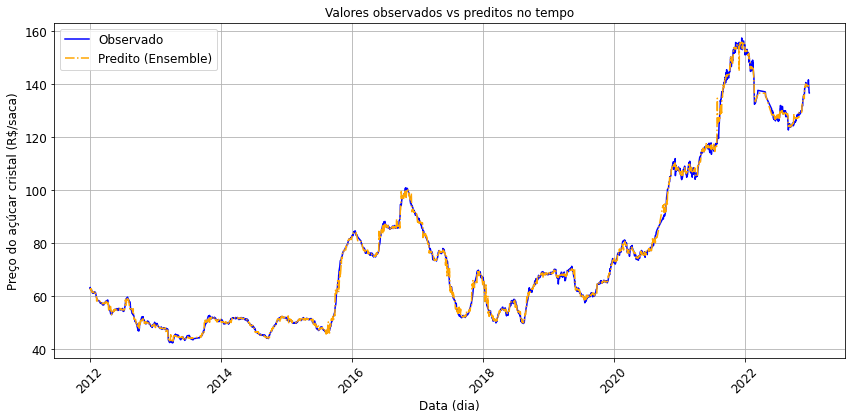

In [321]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches 
# Ensure 'data' is a datetime or numeric column for proper plotting
if not pd.api.types.is_numeric_dtype(dt_serie['data']):
    try:
        # Attempt to convert to datetime if it's string-like
        dt_serie['data'] = pd.to_datetime(dt_serie['data'])
    except:
        pass  # Handle potential conversion errors gracefully

# Create the plot with clear labels and styling
plt.figure(figsize=(12, 6))  # Adjust figure size as desired
plt.rcParams.update({'font.size': 12})
plt.plot(dt_serie['data'], dt_serie['observado'], label='Observado', color='b')
plt.plot(dt_serie['data'], dt_serie['ensemble'], label='Predito (Ensemble)', linestyle='-.', color='orange')
plt.xlabel('Data (dia)', fontsize=12)
plt.ylabel('Preço do açúcar cristal (R$/saca)', fontsize=12)
plt.title('Valores observados vs preditos no tempo', fontsize=12)

# Add the legend with the custom box
plt.legend()

plt.grid(True)  # Add a grid for better readability

# Customize plot aesthetics (optional)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability with many data points

# Show the plot
plt.tight_layout()
plt.show()
